# Cleaning

In [1]:
# importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('Airline_review.csv')

df.head()

,Review_Title,Review Date,Review,Type Of Traveller,Seat Type,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended,Total Score,Review Period,sentiment,sentiment_score
0,"""pretty decent airline""",2019-01-01,moroni moheli . turned pretty decent airline ....,Solo Leisure,Economy Class,4.0,5.0,4.0,4.0,2.0,1.0,3.0,yes,23.0,0,1,0.9217
1,"""Not a good airline""",2019-01-01,moroni anjouan . small airline . ticket advise...,Solo Leisure,Economy Class,2.0,2.0,1.0,1.0,2.0,1.0,2.0,no,11.0,0,0,-0.0258
2,"""flight was fortunately short""",2019-01-01,anjouan dzaoudzi . small airline airline based...,Solo Leisure,Economy Class,2.0,1.0,1.0,1.0,2.0,1.0,2.0,no,10.0,0,1,0.8264
3,"""I will never fly again with Adria""",2019-01-01,please favor fly adria . route munich pristina...,Solo Leisure,Economy Class,1.0,1.0,2.0,1.0,2.0,1.0,1.0,no,9.0,0,0,-0.9054
4,"""it ruined our last days of holidays""",2019-01-01,book flight airline ! friend returned sofia am...,Couple Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,7.0,0,1,0.5255


In [3]:
#Compute the percentage for each traveller type

# Replace empty and None values with "Other Type of Travellers"
df['Type Of Traveller'].fillna('Other Type of Travellers', inplace=True)

# Dropping [Aircraft. Verfied, Route, Overall_Rating] since it has no value to our research
# df.drop('Aircraft', axis=1, inplace=True)
# df.drop('Verified', axis=1, inplace=True)
# df.drop('Route', axis=1, inplace=True)
# df.drop('Overall_Rating', axis=1, inplace=True)

# Replacing nan values across the individual ratings columns with same scales
columns_to_fill = ['Seat Comfort', 
                   'Cabin Staff Service', 
                   'Food & Beverages', 
                   'Ground Service', 
                   'Inflight Entertainment', 
                   'Wifi & Connectivity', 
                   'Value For Money']

# replacing nan values with mean
for column in columns_to_fill:
    df[column].fillna(int(df[column].mean()), inplace=True)

# Creating a new column that sums up the individual ratings
df['Total Score'] = df[columns_to_fill].sum(axis=1)

# removing non-quantitative & unnecessary attributes
df.drop('Review_Title', axis=1, inplace=True)
df.drop('Review Date', axis=1, inplace=True)
df.drop('Review', axis=1, inplace=True)
df.drop('Type Of Traveller', axis=1, inplace=True)
df.drop('Seat Type', axis=1, inplace=True)
df.drop('sentiment_score', axis=1, inplace=True)

# scaling attributes

col_name = ['Seat Comfort', 
            'Cabin Staff Service', 
            'Food & Beverages',
            'Ground Service', 
            'Inflight Entertainment', 
            'Wifi & Connectivity', 
            'Value For Money', 
            'Total Score',
            'sentiment']

scaler = StandardScaler()
features = df[col_name]
scaler.fit(features)
features = scaler.transform(features.values)

# encoding recommended attribute

## Initialize the LabelEncoder
label_encoder = LabelEncoder()

## Fit and transform the categorical column
df['Recommended'] = label_encoder.fit_transform(df['Recommended'])

# As we are only interested in pre and post-covid, we will segregate into before-2020 and post-2020 (incl 2020)
# Separate the pre-covid and post-covid into two new data frames
pre_covid = df[df['Review Period'] == 0]
post_covid = df[df['Review Period'] == 1]

pre_covid.head()

/usr/local/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended,Total Score,Review Period,sentiment
0,4.0,5.0,4.0,4.0,2.0,1.0,3.0,1,23.0,0,1
1,2.0,2.0,1.0,1.0,2.0,1.0,2.0,0,11.0,0,0
2,2.0,1.0,1.0,1.0,2.0,1.0,2.0,0,10.0,0,1
3,1.0,1.0,2.0,1.0,2.0,1.0,1.0,0,9.0,0,0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0,7.0,0,1


# Recommended

In [4]:
pre_covid2 = pre_covid.copy()
pre_covid2.drop('Review Period', axis=1, inplace=True)

# dropping target variable
X = pre_covid2.drop('Recommended', axis=1)

# target variable
y = pre_covid2['Recommended']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Pre-Covid

### No Resampling

Logistic Regression

In [5]:
modelA = LogisticRegression()
modelA.fit(X_train, y_train)

y_predA = modelA.predict(X_test)

accuracy = accuracy_score(y_test, y_predA)
confusion = confusion_matrix(y_test, y_predA)
classification_rep = classification_report(y_test, y_predA)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.926509186351706
Confusion Matrix:
[[1170   84]
 [  84  948]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1254
           1       0.92      0.92      0.92      1032

    accuracy                           0.93      2286
   macro avg       0.93      0.93      0.93      2286
weighted avg       0.93      0.93      0.93      2286



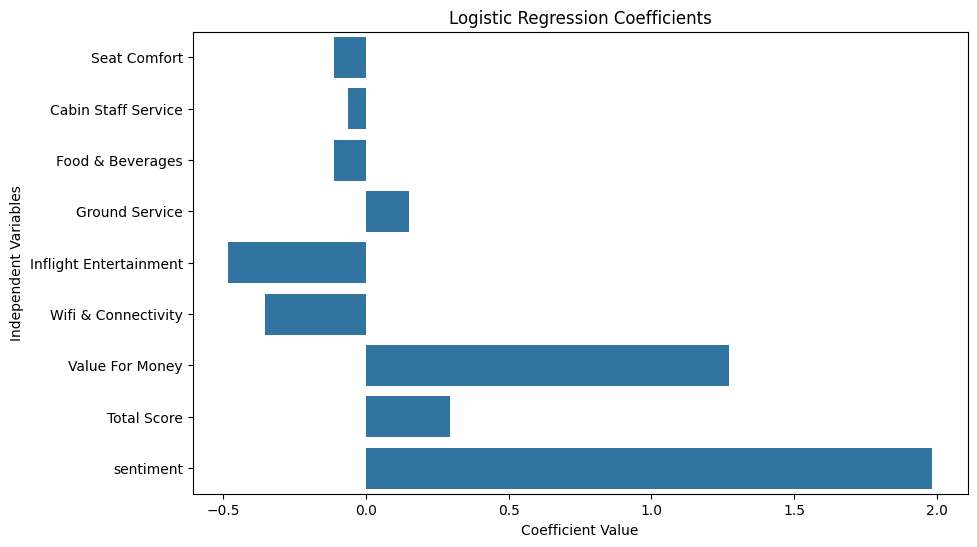

In [6]:
coef_names = ['Seat Comfort',
              'Cabin Staff Service',
              'Food & Beverages',
              'Ground Service',
              'Inflight Entertainment',
              'Wifi & Connectivity',
              'Value For Money',
              'Total Score',
              'sentiment']  

coef_values = modelA.coef_[0]

plt.figure(figsize=(10, 6))
sns.barplot(x=coef_values, y=coef_names)
plt.xlabel('Coefficient Value')
plt.ylabel('Independent Variables')
plt.title('Logistic Regression Coefficients')
plt.show()

Decision Tree

In [7]:
# decision tree classifier
tree_classifierA = DecisionTreeClassifier()
tree_classifierA.fit(X_train, y_train)

## making predictions using decision tree classifier
y_pred = tree_classifierA.predict(X_test)

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(tree_classifierA, param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_tree_classifierA = grid_search.best_estimator_

# evaluation metrics

y_predB = best_tree_classifierA.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_predB)
print(f'Accuracy: {accuracy:.2f}')

# Calculate precision
precision = precision_score(y_test, y_predB)
print(f'Precision: {precision:.2f}')

# Calculate recall
recall = recall_score(y_test, y_predB)
print(f'Recall: {recall:.2f}')

# Calculate F1-score
f1 = f1_score(y_test, y_predB)
print(f'F1-score: {f1:.2f}')

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_predB)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.93
Precision: 0.93
Recall: 0.91
F1-score: 0.92
Confusion Matrix:
[[1178   76]
 [  94  938]]


Random Forest

In [8]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Confusion Matrix:
[[1178   76]
 [  94  938]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1254
           1       0.92      0.92      0.92      1032

    accuracy                           0.93      2286
   macro avg       0.93      0.93      0.93      2286
weighted avg       0.93      0.93      0.93      2286



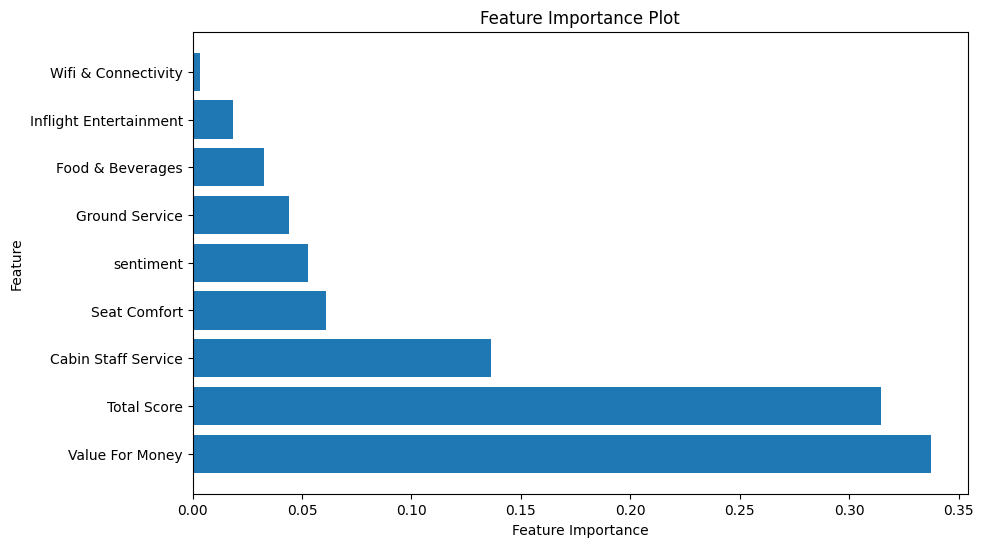

In [9]:
coef_names = ['Seat Comfort',
              'Cabin Staff Service',
              'Food & Beverages',
              'Ground Service',
              'Inflight Entertainment',
              'Wifi & Connectivity',
              'Value For Money',
              'Total Score',
              'sentiment'] 

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a pandas DataFrame to store the importances and corresponding feature names
importance_df = pd.DataFrame({'Feature': coef_names, 'Importance': feature_importances})

# Sort the DataFrame by importance values (optional but makes the plot look cleaner)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()

### Sequential Application

In [10]:
# smote

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train1, y_train1 = smote.fit_resample(X_train, y_train)

# enn

enn = EditedNearestNeighbours(sampling_strategy='auto', n_neighbors=3)
X_train2, y_train2 = enn.fit_resample(X_train1, y_train1)

# smoteenn

smote_enn = SMOTEENN(sampling_strategy='auto', random_state=42)
X_train3, y_train3 = smote_enn.fit_resample(X_train2, y_train2)

Logistic Regression

In [11]:
model = LogisticRegression()
model.fit(X_train3, y_train3)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.8534558180227472
Confusion Matrix:
[[1196   58]
 [ 277  755]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.95      0.88      1254
           1       0.93      0.73      0.82      1032

    accuracy                           0.85      2286
   macro avg       0.87      0.84      0.85      2286
weighted avg       0.86      0.85      0.85      2286



Decision Tree

In [12]:
# decision tree classifier
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train3, y_train3)

## making predictions using decision tree classifier
y_pred = tree_classifier.predict(X_test)

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train3, y_train3)

best_tree_classifier = grid_search.best_estimator_

# evaluation metrics

y_pred = best_tree_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print(f'F1-score: {f1:.2f}')

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.86
Precision: 0.94
Recall: 0.72
F1-score: 0.82
Confusion Matrix:
[[1210   44]
 [ 287  745]]


Random Forest

In [13]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train3, y_train3)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Confusion Matrix:
[[1210   44]
 [ 287  745]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.95      0.88      1254
           1       0.93      0.73      0.82      1032

    accuracy                           0.85      2286
   macro avg       0.87      0.84      0.85      2286
weighted avg       0.86      0.85      0.85      2286



### Parallel Application

SMOTE

Logistic Regression

In [14]:
# smote

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train1, y_train1 = smote.fit_resample(X_train, y_train)

model1 = LogisticRegression()
model1.fit(X_train1, y_train1)

y_pred1 = model1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred1)
confusion = confusion_matrix(y_test, y_pred1)
classification_rep = classification_report(y_test, y_pred1)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9238845144356955
Confusion Matrix:
[[1155   99]
 [  75  957]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1254
           1       0.91      0.93      0.92      1032

    accuracy                           0.92      2286
   macro avg       0.92      0.92      0.92      2286
weighted avg       0.92      0.92      0.92      2286



Decision Tree

In [15]:
tree_classifier1 = DecisionTreeClassifier()
tree_classifier1.fit(X_train1, y_train1)

# making predictions using decision tree classifier
y_pred1 = tree_classifier1.predict(X_test)

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(tree_classifier1, param_grid, cv=5)
grid_search.fit(X_train1, y_train1)

best_tree_classifier1 = grid_search.best_estimator_

# evaluation metrics

y_pred = best_tree_classifier1.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred1)
print(f'Accuracy: {accuracy:.2f}')

# Calculate precision
precision = precision_score(y_test, y_pred1)
print(f'Precision: {precision:.2f}')

# Calculate recall
recall = recall_score(y_test, y_pred1)
print(f'Recall: {recall:.2f}')

# Calculate F1-score
f1 = f1_score(y_test, y_pred1)
print(f'F1-score: {f1:.2f}')

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred1)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.92
Precision: 0.92
Recall: 0.91
F1-score: 0.91
Confusion Matrix:
[[1177   77]
 [  97  935]]


Random Forest

In [16]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train1, y_train1)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Confusion Matrix:
[[1177   77]
 [  97  935]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1254
           1       0.91      0.93      0.92      1032

    accuracy                           0.92      2286
   macro avg       0.92      0.92      0.92      2286
weighted avg       0.92      0.92      0.92      2286



ENN

Logistic Regression

In [17]:
# enn

enn = EditedNearestNeighbours(sampling_strategy='auto', n_neighbors=3)
X_train2, y_train2 = enn.fit_resample(X_train, y_train)

model2 = LogisticRegression()
model2.fit(X_train2, y_train2)

y_pred2 = model2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred2)
confusion = confusion_matrix(y_test, y_pred2)
classification_rep = classification_report(y_test, y_pred2)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9138232720909887
Confusion Matrix:
[[1112  142]
 [  55  977]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1254
           1       0.87      0.95      0.91      1032

    accuracy                           0.91      2286
   macro avg       0.91      0.92      0.91      2286
weighted avg       0.92      0.91      0.91      2286



Decision Tree

In [18]:
tree_classifier2 = DecisionTreeClassifier()
tree_classifier2.fit(X_train2, y_train2)

# making predictions using decision tree classifier
y_pred2 = tree_classifier2.predict(X_test)

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(tree_classifier2, param_grid, cv=5)
grid_search.fit(X_train2, y_train2)

best_tree_classifier2 = grid_search.best_estimator_

# evaluation metrics

y_pred = best_tree_classifier2.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred2)
print(f'Accuracy: {accuracy:.2f}')

# Calculate precision
precision = precision_score(y_test, y_pred2)
print(f'Precision: {precision:.2f}')

# Calculate recall
recall = recall_score(y_test, y_pred2)
print(f'Recall: {recall:.2f}')

# Calculate F1-score
f1 = f1_score(y_test, y_pred2)
print(f'F1-score: {f1:.2f}')

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred2)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.85
Precision: 0.77
Recall: 0.96
F1-score: 0.85
Confusion Matrix:
[[952 302]
 [ 42 990]]


Random Forest

In [19]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train2, y_train2)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Confusion Matrix:
[[952 302]
 [ 42 990]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1254
           1       0.87      0.95      0.91      1032

    accuracy                           0.91      2286
   macro avg       0.91      0.92      0.91      2286
weighted avg       0.92      0.91      0.91      2286



SMOTE-ENN

Logistic Regression

In [20]:
# smoteenn

smote_enn = SMOTEENN(sampling_strategy='auto', random_state=42)
X_train3, y_train3 = smote_enn.fit_resample(X_train, y_train)

model3 = LogisticRegression()
model3.fit(X_train3, y_train3)

y_pred3 = model3.predict(X_test)

accuracy = accuracy_score(y_test, y_pred3)
confusion = confusion_matrix(y_test, y_pred3)
classification_rep = classification_report(y_test, y_pred3)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9230096237970253
Confusion Matrix:
[[1148  106]
 [  70  962]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1254
           1       0.90      0.93      0.92      1032

    accuracy                           0.92      2286
   macro avg       0.92      0.92      0.92      2286
weighted avg       0.92      0.92      0.92      2286



Decision Tree

In [21]:
tree_classifier3 = DecisionTreeClassifier()
tree_classifier3.fit(X_train3, y_train3)

# making predictions using decision tree classifier
y_pred3 = tree_classifier3.predict(X_test)

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(tree_classifier3, param_grid, cv=5)
grid_search.fit(X_train3, y_train3)

best_tree_classifier3 = grid_search.best_estimator_

# evaluation metrics

y_pred = best_tree_classifier3.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred3)
print(f'Accuracy: {accuracy:.2f}')

# Calculate precision
precision = precision_score(y_test, y_pred3)
print(f'Precision: {precision:.2f}')

# Calculate recall
recall = recall_score(y_test, y_pred3)
print(f'Recall: {recall:.2f}')

# Calculate F1-score
f1 = f1_score(y_test, y_pred3)
print(f'F1-score: {f1:.2f}')

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred3)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.93
Precision: 0.91
Recall: 0.94
F1-score: 0.92
Confusion Matrix:
[[1161   93]
 [  67  965]]


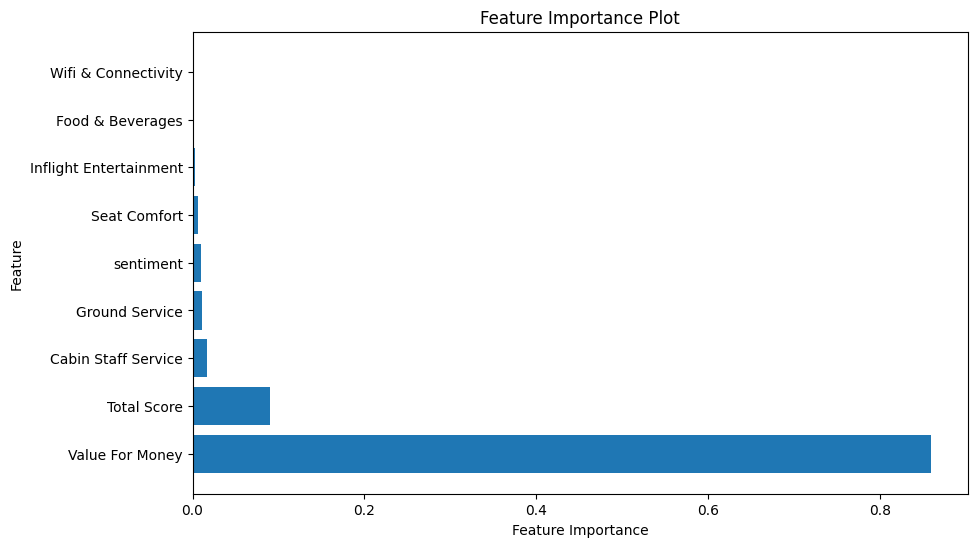

In [22]:
coef_names = ['Seat Comfort',
              'Cabin Staff Service',
              'Food & Beverages',
              'Ground Service',
              'Inflight Entertainment',
              'Wifi & Connectivity',
              'Value For Money',
              'Total Score',
              'sentiment']  

# Get feature importances
feature_importances = best_tree_classifier3.feature_importances_

# Create a pandas DataFrame to store the importances and corresponding feature names
importance_df = pd.DataFrame({'Feature': coef_names, 'Importance': feature_importances})

# Sort the DataFrame by importance values (optional but makes the plot look cleaner)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()

Random Forest

In [23]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train3, y_train3)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Confusion Matrix:
[[1161   93]
 [  67  965]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1254
           1       0.90      0.93      0.92      1032

    accuracy                           0.92      2286
   macro avg       0.92      0.92      0.92      2286
weighted avg       0.92      0.92      0.92      2286



## Post-Covid

In [24]:
post_covid.drop('Review Period', axis=1)

post_covid2 = pre_covid.copy()
post_covid2.drop('Review Period', axis=1, inplace=True)

# dropping target variable
X = post_covid2.drop('Recommended', axis=1)  

# target variable
y = post_covid2['Recommended']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### No Resampling

Logistic Regression

In [25]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.926509186351706
Confusion Matrix:
[[1170   84]
 [  84  948]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1254
           1       0.92      0.92      0.92      1032

    accuracy                           0.93      2286
   macro avg       0.93      0.93      0.93      2286
weighted avg       0.93      0.93      0.93      2286



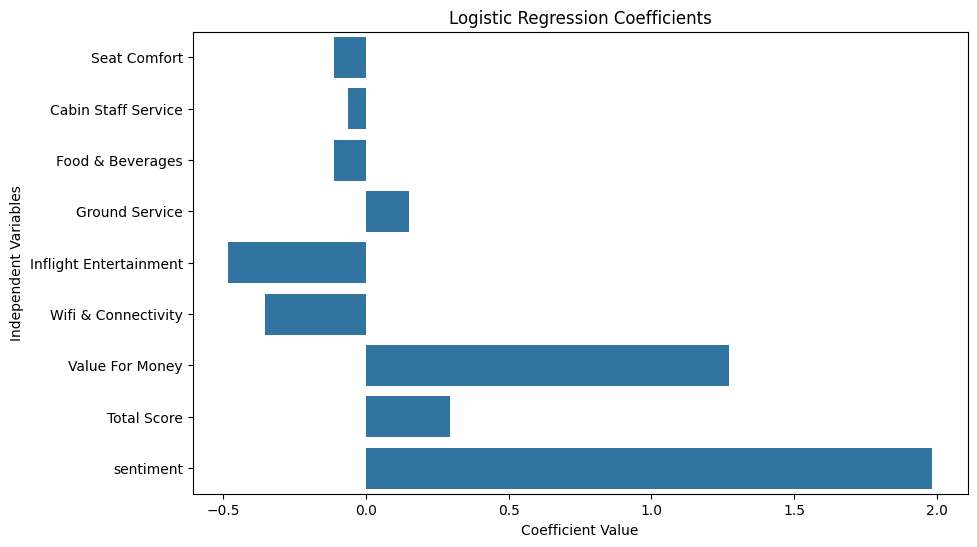

In [26]:
coef_names = ['Seat Comfort',
              'Cabin Staff Service',
              'Food & Beverages',
              'Ground Service',
              'Inflight Entertainment',
              'Wifi & Connectivity',
              'Value For Money',
              'Total Score',
              'sentiment']  

coef_values = model.coef_[0]

plt.figure(figsize=(10, 6))
sns.barplot(x=coef_values, y=coef_names)
plt.xlabel('Coefficient Value')
plt.ylabel('Independent Variables')
plt.title('Logistic Regression Coefficients')
plt.show()

Decision Tree

In [27]:
# decision tree classifier
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, y_train)

# making predictions using decision tree classifier
y_pred = tree_classifier.predict(X_test)

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_tree_classifier = grid_search.best_estimator_

# evaluation metrics

y_pred = best_tree_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print(f'F1-score: {f1:.2f}')

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.93
Precision: 0.93
Recall: 0.90
F1-score: 0.92
Confusion Matrix:
[[1183   71]
 [  99  933]]


Random Forest

In [28]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Confusion Matrix:
[[1183   71]
 [  99  933]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1254
           1       0.92      0.92      0.92      1032

    accuracy                           0.93      2286
   macro avg       0.93      0.93      0.93      2286
weighted avg       0.93      0.93      0.93      2286



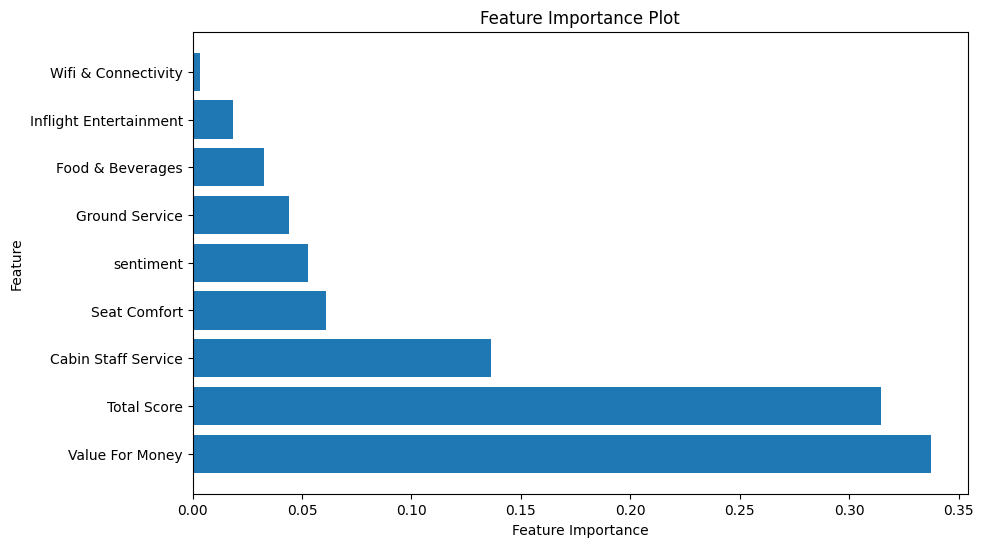

In [29]:
coef_names = ['Seat Comfort',
              'Cabin Staff Service',
              'Food & Beverages',
              'Ground Service',
              'Inflight Entertainment',
              'Wifi & Connectivity',
              'Value For Money',
              'Total Score',
              'sentiment'] 

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a pandas DataFrame to store the importances and corresponding feature names
importance_df = pd.DataFrame({'Feature': coef_names, 'Importance': feature_importances})

# Sort the DataFrame by importance values (optional but makes the plot look cleaner)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()

### Sequential Application

In [30]:
# smote

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train1, y_train1 = smote.fit_resample(X_train, y_train)

# enn

enn = EditedNearestNeighbours(sampling_strategy='auto', n_neighbors=3)
X_train2, y_train2 = enn.fit_resample(X_train1, y_train1)

# smoteenn

smote_enn = SMOTEENN(sampling_strategy='auto', random_state=42)
X_train3, y_train3 = smote_enn.fit_resample(X_train2, y_train2)

Logistic Regression

In [31]:
model = LogisticRegression()
model.fit(X_train3, y_train3)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.8534558180227472
Confusion Matrix:
[[1196   58]
 [ 277  755]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.95      0.88      1254
           1       0.93      0.73      0.82      1032

    accuracy                           0.85      2286
   macro avg       0.87      0.84      0.85      2286
weighted avg       0.86      0.85      0.85      2286



Decision Tree

In [32]:
# decision tree classifier
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train3, y_train3)

# making predictions using decision tree classifier
y_pred = tree_classifier.predict(X_test)

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train3, y_train3)

best_tree_classifier = grid_search.best_estimator_

# evaluation metrics

y_pred = best_tree_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print(f'F1-score: {f1:.2f}')

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.86
Precision: 0.94
Recall: 0.72
F1-score: 0.82
Confusion Matrix:
[[1210   44]
 [ 287  745]]


Random Forest

In [33]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train3, y_train3)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Confusion Matrix:
[[1210   44]
 [ 287  745]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.95      0.88      1254
           1       0.93      0.73      0.82      1032

    accuracy                           0.85      2286
   macro avg       0.87      0.84      0.85      2286
weighted avg       0.86      0.85      0.85      2286



### Parallel Application

SMOTE

Logistic Regression

In [34]:
# smote

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train1, y_train1 = smote.fit_resample(X_train, y_train)

model1 = LogisticRegression()
model1.fit(X_train1, y_train1)

y_pred1 = model1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred1)
confusion = confusion_matrix(y_test, y_pred1)
classification_rep = classification_report(y_test, y_pred1)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9238845144356955
Confusion Matrix:
[[1155   99]
 [  75  957]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1254
           1       0.91      0.93      0.92      1032

    accuracy                           0.92      2286
   macro avg       0.92      0.92      0.92      2286
weighted avg       0.92      0.92      0.92      2286



Decision Tree

In [35]:
tree_classifier1 = DecisionTreeClassifier()
tree_classifier1.fit(X_train1, y_train1)

# making predictions using decision tree classifier
y_pred1 = tree_classifier1.predict(X_test)

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(tree_classifier1, param_grid, cv=5)
grid_search.fit(X_train1, y_train1)

best_tree_classifier1 = grid_search.best_estimator_

# evaluation metrics

y_pred = best_tree_classifier1.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred1)
print(f'Accuracy: {accuracy:.2f}')

# Calculate precision
precision = precision_score(y_test, y_pred1)
print(f'Precision: {precision:.2f}')

# Calculate recall
recall = recall_score(y_test, y_pred1)
print(f'Recall: {recall:.2f}')

# Calculate F1-score
f1 = f1_score(y_test, y_pred1)
print(f'F1-score: {f1:.2f}')

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred1)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.92
Precision: 0.92
Recall: 0.90
F1-score: 0.91
Confusion Matrix:
[[1174   80]
 [ 100  932]]


Random Forest

In [36]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train1, y_train1)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Confusion Matrix:
[[1174   80]
 [ 100  932]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1254
           1       0.91      0.93      0.92      1032

    accuracy                           0.92      2286
   macro avg       0.92      0.92      0.92      2286
weighted avg       0.92      0.92      0.92      2286



ENN

Logistic Regression

In [37]:
# enn

enn = EditedNearestNeighbours(sampling_strategy='auto', n_neighbors=3)
X_train2, y_train2 = enn.fit_resample(X_train, y_train)

model2 = LogisticRegression()
model2.fit(X_train2, y_train2)

y_pred2 = model2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred2)
confusion = confusion_matrix(y_test, y_pred2)
classification_rep = classification_report(y_test, y_pred2)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9138232720909887
Confusion Matrix:
[[1112  142]
 [  55  977]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1254
           1       0.87      0.95      0.91      1032

    accuracy                           0.91      2286
   macro avg       0.91      0.92      0.91      2286
weighted avg       0.92      0.91      0.91      2286



Decision Tree

In [38]:
tree_classifier2 = DecisionTreeClassifier()
tree_classifier2.fit(X_train2, y_train2)

# making predictions using decision tree classifier
y_pred2 = tree_classifier2.predict(X_test)

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(tree_classifier2, param_grid, cv=5)
grid_search.fit(X_train2, y_train2)

best_tree_classifier2 = grid_search.best_estimator_

# evaluation metrics

y_pred = best_tree_classifier2.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred2)
print(f'Accuracy: {accuracy:.2f}')

# Calculate precision
precision = precision_score(y_test, y_pred2)
print(f'Precision: {precision:.2f}')

# Calculate recall
recall = recall_score(y_test, y_pred2)
print(f'Recall: {recall:.2f}')

# Calculate F1-score
f1 = f1_score(y_test, y_pred2)
print(f'F1-score: {f1:.2f}')

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred2)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.85
Precision: 0.77
Recall: 0.96
F1-score: 0.85
Confusion Matrix:
[[950 304]
 [ 42 990]]


Random Forest

In [39]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train2, y_train2)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Confusion Matrix:
[[950 304]
 [ 42 990]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92      1254
           1       0.87      0.95      0.91      1032

    accuracy                           0.91      2286
   macro avg       0.91      0.92      0.91      2286
weighted avg       0.92      0.91      0.91      2286



SMOTE-ENN

Logistic Regression

In [40]:
# smoteenn

smote_enn = SMOTEENN(sampling_strategy='auto', random_state=42)
X_train3, y_train3 = smote_enn.fit_resample(X_train, y_train)

model3 = LogisticRegression()
model3.fit(X_train3, y_train3)

y_pred3 = model3.predict(X_test)

accuracy = accuracy_score(y_test, y_pred3)
confusion = confusion_matrix(y_test, y_pred3)
classification_rep = classification_report(y_test, y_pred3)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9230096237970253
Confusion Matrix:
[[1148  106]
 [  70  962]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1254
           1       0.90      0.93      0.92      1032

    accuracy                           0.92      2286
   macro avg       0.92      0.92      0.92      2286
weighted avg       0.92      0.92      0.92      2286



Decision Tree

In [41]:
tree_classifier3 = DecisionTreeClassifier()
tree_classifier3.fit(X_train3, y_train3)

# making predictions using decision tree classifier
y_pred3 = tree_classifier3.predict(X_test)

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(tree_classifier3, param_grid, cv=5)
grid_search.fit(X_train3, y_train3)

best_tree_classifier3 = grid_search.best_estimator_

# evaluation metrics

y_pred = best_tree_classifier3.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred3)
print(f'Accuracy: {accuracy:.2f}')

# Calculate precision
precision = precision_score(y_test, y_pred3)
print(f'Precision: {precision:.2f}')

# Calculate recall
recall = recall_score(y_test, y_pred3)
print(f'Recall: {recall:.2f}')

# Calculate F1-score
f1 = f1_score(y_test, y_pred3)
print(f'F1-score: {f1:.2f}')

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred3)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.93
Precision: 0.91
Recall: 0.94
F1-score: 0.92
Confusion Matrix:
[[1162   92]
 [  67  965]]


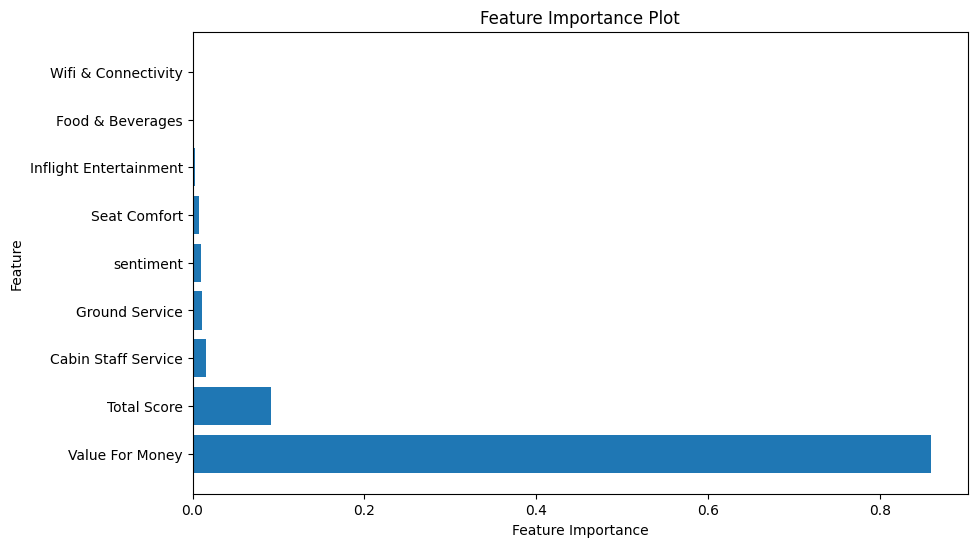

In [42]:
coef_names = ['Seat Comfort',
              'Cabin Staff Service',
              'Food & Beverages',
              'Ground Service',
              'Inflight Entertainment',
              'Wifi & Connectivity',
              'Value For Money',
              'Total Score',
              'sentiment']  

# Get feature importances
feature_importances = best_tree_classifier3.feature_importances_

# Create a pandas DataFrame to store the importances and corresponding feature names
importance_df = pd.DataFrame({'Feature': coef_names, 'Importance': feature_importances})

# Sort the DataFrame by importance values (optional but makes the plot look cleaner)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()

Random Forest

In [43]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train3, y_train3)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Confusion Matrix:
[[1162   92]
 [  67  965]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1254
           1       0.90      0.93      0.92      1032

    accuracy                           0.92      2286
   macro avg       0.92      0.92      0.92      2286
weighted avg       0.92      0.92      0.92      2286



# sentiment

In [44]:
pre_covid3 = pre_covid.copy()

pre_covid3.drop('Review Period', axis=1, inplace=True)

# dropping target variable
X = pre_covid3.drop('sentiment', axis=1)  

# target variable
y = pre_covid3['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Pre-Covid

### No Resampling

Logistic Regression

In [45]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.7620297462817148
Confusion Matrix:
[[ 667  147]
 [ 397 1075]]
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.82      0.71       814
           1       0.88      0.73      0.80      1472

    accuracy                           0.76      2286
   macro avg       0.75      0.77      0.75      2286
weighted avg       0.79      0.76      0.77      2286



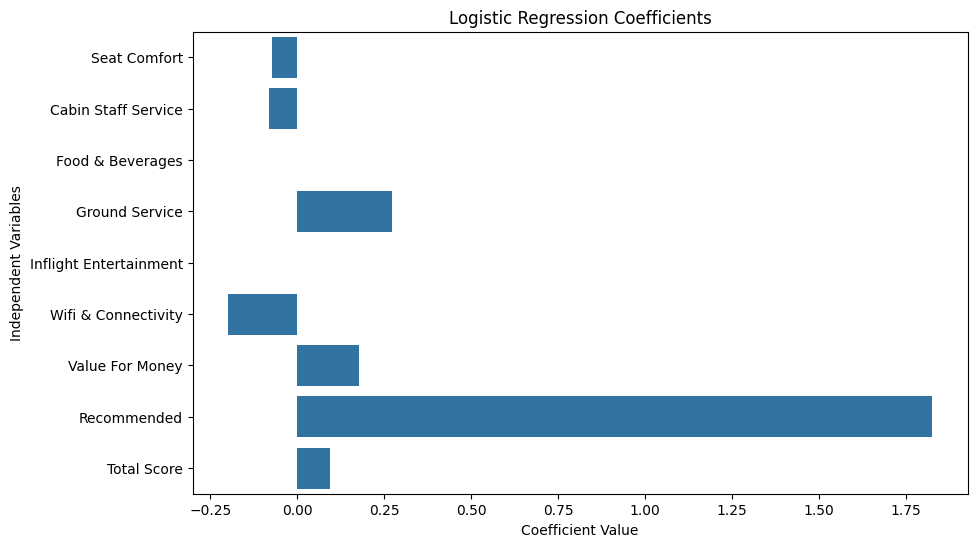

In [46]:
coef_names = ['Seat Comfort',
              'Cabin Staff Service',
              'Food & Beverages',
              'Ground Service',
              'Inflight Entertainment',
              'Wifi & Connectivity',
              'Value For Money',
              'Recommended',
              'Total Score']  

coef_values = model.coef_[0]

plt.figure(figsize=(10, 6))
sns.barplot(x=coef_values, y=coef_names)
plt.xlabel('Coefficient Value')
plt.ylabel('Independent Variables')
plt.title('Logistic Regression Coefficients')
plt.show()

Decision Tree

In [47]:
# decision tree classifier
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, y_train)

# making predictions using decision tree classifier
y_pred = tree_classifier.predict(X_test)

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_tree_classifier = grid_search.best_estimator_

# evaluation metrics

y_pred = best_tree_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print(f'F1-score: {f1:.2f}')

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.80
Precision: 0.87
Recall: 0.82
F1-score: 0.84
Confusion Matrix:
[[ 625  189]
 [ 259 1213]]


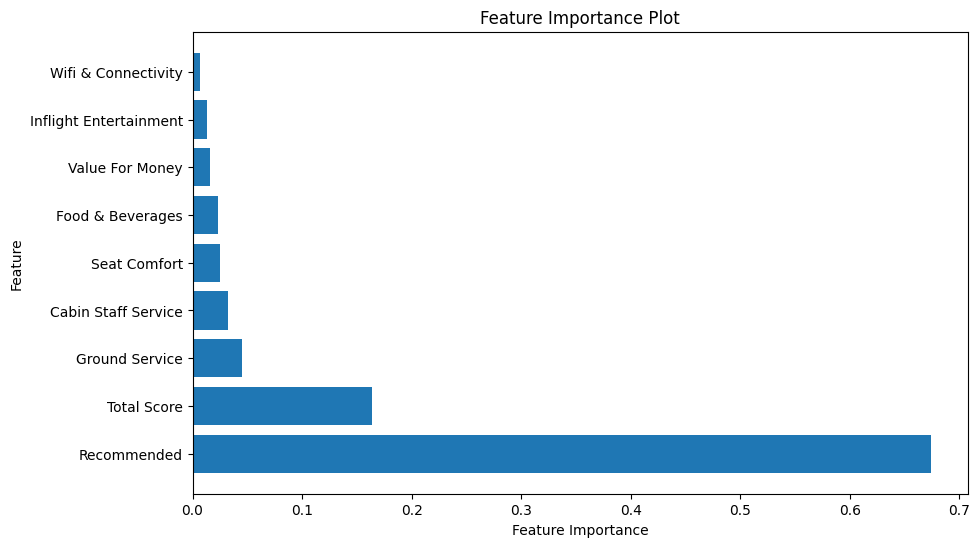

In [48]:
coef_names = ['Seat Comfort',
              'Cabin Staff Service',
              'Food & Beverages',
              'Ground Service',
              'Inflight Entertainment',
              'Wifi & Connectivity',
              'Value For Money',
              'Recommended',
              'Total Score'] 

# Get feature importances
feature_importances = best_tree_classifier.feature_importances_

# Create a pandas DataFrame to store the importances and corresponding feature names
importance_df = pd.DataFrame({'Feature': coef_names, 'Importance': feature_importances})

# Sort the DataFrame by importance values (optional but makes the plot look cleaner)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()

Random Forest

In [49]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Confusion Matrix:
[[ 625  189]
 [ 259 1213]]

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.82      0.71       814
           1       0.88      0.73      0.80      1472

    accuracy                           0.76      2286
   macro avg       0.75      0.77      0.75      2286
weighted avg       0.79      0.76      0.77      2286



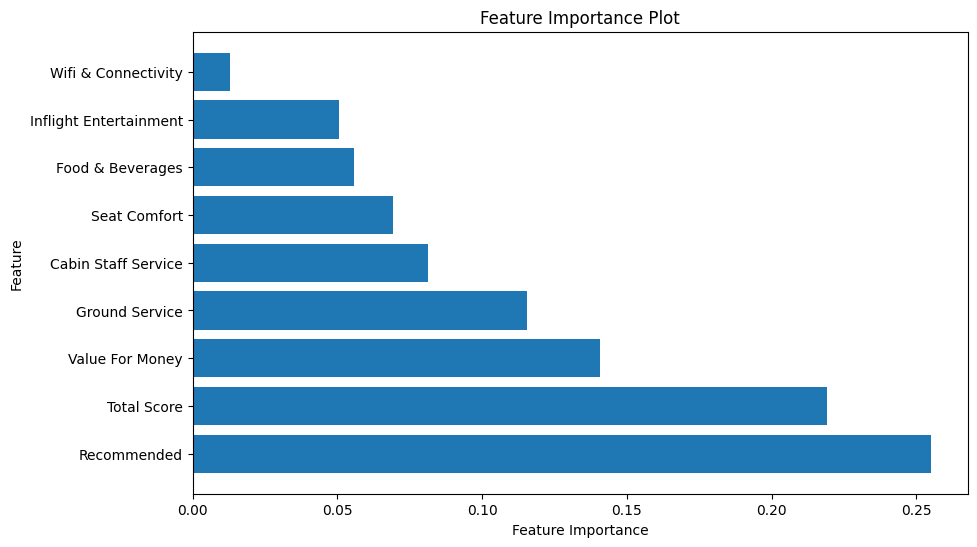

In [50]:
coef_names = ['Seat Comfort',
              'Cabin Staff Service',
              'Food & Beverages',
              'Ground Service',
              'Inflight Entertainment',
              'Wifi & Connectivity',
              'Value For Money',
              'Recommended',
              'Total Score'] 

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a pandas DataFrame to store the importances and corresponding feature names
importance_df = pd.DataFrame({'Feature': coef_names, 'Importance': feature_importances})

# Sort the DataFrame by importance values (optional but makes the plot look cleaner)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()

### Sequential Application

In [51]:
# smote

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train1, y_train1 = smote.fit_resample(X_train, y_train)

# enn

enn = EditedNearestNeighbours(sampling_strategy='auto', n_neighbors=3)
X_train2, y_train2 = enn.fit_resample(X_train1, y_train1)

# smoteenn

smote_enn = SMOTEENN(sampling_strategy='auto', random_state=42)
X_train3, y_train3 = smote_enn.fit_resample(X_train2, y_train2)

Logistic Regression

In [52]:
model = LogisticRegression()
model.fit(X_train3, y_train3)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.747594050743657
Confusion Matrix:
[[757  57]
 [520 952]]
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.93      0.72       814
           1       0.94      0.65      0.77      1472

    accuracy                           0.75      2286
   macro avg       0.77      0.79      0.75      2286
weighted avg       0.82      0.75      0.75      2286



Decision Tree

In [53]:
# decision tree classifier
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train3, y_train3)

# making predictions using decision tree classifier
y_pred = tree_classifier.predict(X_test)

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train3, y_train3)

best_tree_classifier = grid_search.best_estimator_

# evaluation metrics

y_pred = best_tree_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print(f'F1-score: {f1:.2f}')

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.64
Precision: 0.94
Recall: 0.47
F1-score: 0.63
Confusion Matrix:
[[773  41]
 [781 691]]


Random Forest

In [54]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train3, y_train3)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Confusion Matrix:
[[773  41]
 [781 691]]

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.93      0.72       814
           1       0.94      0.65      0.77      1472

    accuracy                           0.75      2286
   macro avg       0.77      0.79      0.75      2286
weighted avg       0.82      0.75      0.75      2286



### Parallel Application

SMOTE

Logistic Regression

In [55]:
# smote

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train1, y_train1 = smote.fit_resample(X_train, y_train)

model1 = LogisticRegression()
model1.fit(X_train1, y_train1)

y_pred1 = model1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred1)
confusion = confusion_matrix(y_test, y_pred1)
classification_rep = classification_report(y_test, y_pred1)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.7594050743657043
Confusion Matrix:
[[ 728   86]
 [ 464 1008]]
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.89      0.73       814
           1       0.92      0.68      0.79      1472

    accuracy                           0.76      2286
   macro avg       0.77      0.79      0.76      2286
weighted avg       0.81      0.76      0.76      2286



Decision Tree

In [56]:
tree_classifier1 = DecisionTreeClassifier()
tree_classifier1.fit(X_train1, y_train1)

# making predictions using decision tree classifier
y_pred1 = tree_classifier1.predict(X_test)

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(tree_classifier1, param_grid, cv=5)
grid_search.fit(X_train1, y_train1)

best_tree_classifier1 = grid_search.best_estimator_

# evaluation metrics

y_pred = best_tree_classifier1.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred1)
print(f'Accuracy: {accuracy:.2f}')

# Calculate precision
precision = precision_score(y_test, y_pred1)
print(f'Precision: {precision:.2f}')

# Calculate recall
recall = recall_score(y_test, y_pred1)
print(f'Recall: {recall:.2f}')

# Calculate F1-score
f1 = f1_score(y_test, y_pred1)
print(f'F1-score: {f1:.2f}')

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred1)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.78
Precision: 0.86
Recall: 0.79
F1-score: 0.82
Confusion Matrix:
[[ 620  194]
 [ 315 1157]]


Random Forest

In [57]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train1, y_train1)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Confusion Matrix:
[[ 620  194]
 [ 315 1157]]

Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.89      0.73       814
           1       0.92      0.68      0.79      1472

    accuracy                           0.76      2286
   macro avg       0.77      0.79      0.76      2286
weighted avg       0.81      0.76      0.76      2286



ENN

Logistic Regression

In [58]:
# enn

enn = EditedNearestNeighbours(sampling_strategy='auto', n_neighbors=3)
X_train2, y_train2 = enn.fit_resample(X_train, y_train)

model2 = LogisticRegression()
model2.fit(X_train2, y_train2)

y_pred2 = model2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred2)
confusion = confusion_matrix(y_test, y_pred2)
classification_rep = classification_report(y_test, y_pred2)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.7545931758530183
Confusion Matrix:
[[729  85]
 [476 996]]
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.90      0.72       814
           1       0.92      0.68      0.78      1472

    accuracy                           0.75      2286
   macro avg       0.76      0.79      0.75      2286
weighted avg       0.81      0.75      0.76      2286



Decision Tree

In [59]:
tree_classifier2 = DecisionTreeClassifier()
tree_classifier2.fit(X_train2, y_train2)

# making predictions using decision tree classifier
y_pred2 = tree_classifier2.predict(X_test)

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(tree_classifier2, param_grid, cv=5)
grid_search.fit(X_train2, y_train2)

best_tree_classifier2 = grid_search.best_estimator_

# evaluation metrics

y_pred = best_tree_classifier2.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred2)
print(f'Accuracy: {accuracy:.2f}')

# Calculate precision
precision = precision_score(y_test, y_pred2)
print(f'Precision: {precision:.2f}')

# Calculate recall
recall = recall_score(y_test, y_pred2)
print(f'Recall: {recall:.2f}')

# Calculate F1-score
f1 = f1_score(y_test, y_pred2)
print(f'F1-score: {f1:.2f}')

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred2)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.76
Precision: 0.90
Recall: 0.69
F1-score: 0.79
Confusion Matrix:
[[ 706  108]
 [ 451 1021]]


Random Forest

In [60]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train2, y_train2)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Confusion Matrix:
[[ 706  108]
 [ 451 1021]]

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.90      0.72       814
           1       0.92      0.68      0.78      1472

    accuracy                           0.75      2286
   macro avg       0.76      0.79      0.75      2286
weighted avg       0.81      0.75      0.76      2286



SMOTE-ENN

Logistic Regression

In [61]:
# smoteenn

smote_enn = SMOTEENN(sampling_strategy='auto', random_state=42)
X_train3, y_train3 = smote_enn.fit_resample(X_train, y_train)

model3 = LogisticRegression()
model3.fit(X_train3, y_train3)

y_pred3 = model3.predict(X_test)

accuracy = accuracy_score(y_test, y_pred3)
confusion = confusion_matrix(y_test, y_pred3)
classification_rep = classification_report(y_test, y_pred3)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.7598425196850394
Confusion Matrix:
[[ 702  112]
 [ 437 1035]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.86      0.72       814
           1       0.90      0.70      0.79      1472

    accuracy                           0.76      2286
   macro avg       0.76      0.78      0.75      2286
weighted avg       0.80      0.76      0.76      2286



Decision Tree

In [62]:
tree_classifier3 = DecisionTreeClassifier()
tree_classifier3.fit(X_train3, y_train3)

# making predictions using decision tree classifier
y_pred3 = tree_classifier3.predict(X_test)

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(tree_classifier3, param_grid, cv=5)
grid_search.fit(X_train3, y_train3)

best_tree_classifier3 = grid_search.best_estimator_

# evaluation metrics

y_pred = best_tree_classifier3.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred3)
print(f'Accuracy: {accuracy:.2f}')

# Calculate precision
precision = precision_score(y_test, y_pred3)
print(f'Precision: {precision:.2f}')

# Calculate recall
recall = recall_score(y_test, y_pred3)
print(f'Recall: {recall:.2f}')

# Calculate F1-score
f1 = f1_score(y_test, y_pred3)
print(f'F1-score: {f1:.2f}')

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred3)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.79
Precision: 0.90
Recall: 0.76
F1-score: 0.83
Confusion Matrix:
[[ 687  127]
 [ 349 1123]]


Random Forest

In [63]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train3, y_train3)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Confusion Matrix:
[[ 687  127]
 [ 349 1123]]

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.86      0.72       814
           1       0.90      0.70      0.79      1472

    accuracy                           0.76      2286
   macro avg       0.76      0.78      0.75      2286
weighted avg       0.80      0.76      0.76      2286



## Post-Covid

In [64]:
post_covid3 = post_covid.copy()
post_covid3.drop('Review Period', axis=1, inplace=True)

# dropping target variable from x
X = post_covid3.drop('sentiment', axis=1)  

# target variable
y = post_covid3['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### No Resampling

Logistic Regression

In [65]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.7616006811409111
Confusion Matrix:
[[1217   97]
 [ 463  572]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.93      0.81      1314
           1       0.86      0.55      0.67      1035

    accuracy                           0.76      2349
   macro avg       0.79      0.74      0.74      2349
weighted avg       0.78      0.76      0.75      2349



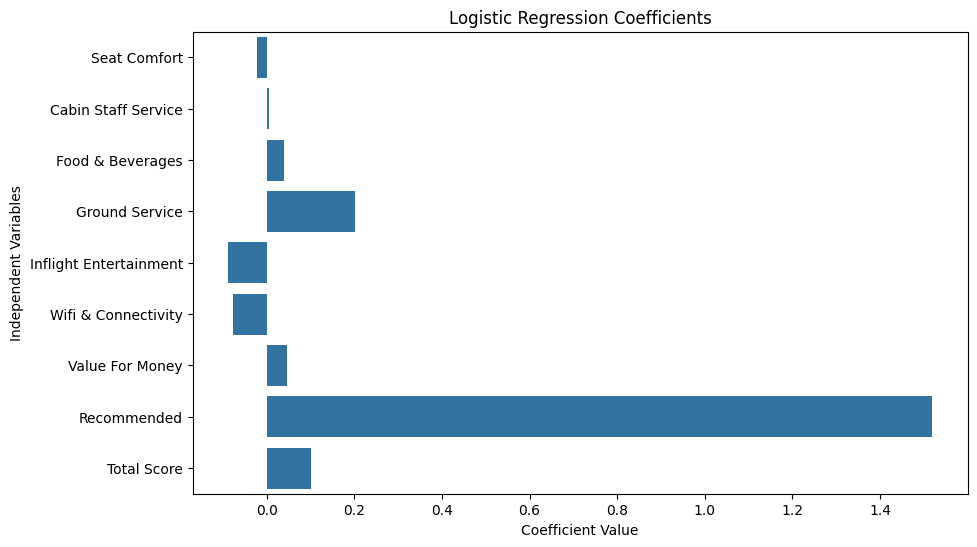

In [66]:
coef_names = ['Seat Comfort',
              'Cabin Staff Service',
              'Food & Beverages',
              'Ground Service',
              'Inflight Entertainment',
              'Wifi & Connectivity',
              'Value For Money',
              'Recommended',
              'Total Score']  

coef_values = model.coef_[0]

plt.figure(figsize=(10, 6))
sns.barplot(x=coef_values, y=coef_names)
plt.xlabel('Coefficient Value')
plt.ylabel('Independent Variables')
plt.title('Logistic Regression Coefficients')
plt.show()

Decision Tree

In [67]:
# decision tree classifier
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train, y_train)

# making predictions using decision tree classifier
y_pred = tree_classifier.predict(X_test)

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_tree_classifier = grid_search.best_estimator_

# evaluation metrics

y_pred = best_tree_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print(f'F1-score: {f1:.2f}')

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.75
Precision: 0.86
Recall: 0.52
F1-score: 0.65
Confusion Matrix:
[[1228   86]
 [ 492  543]]


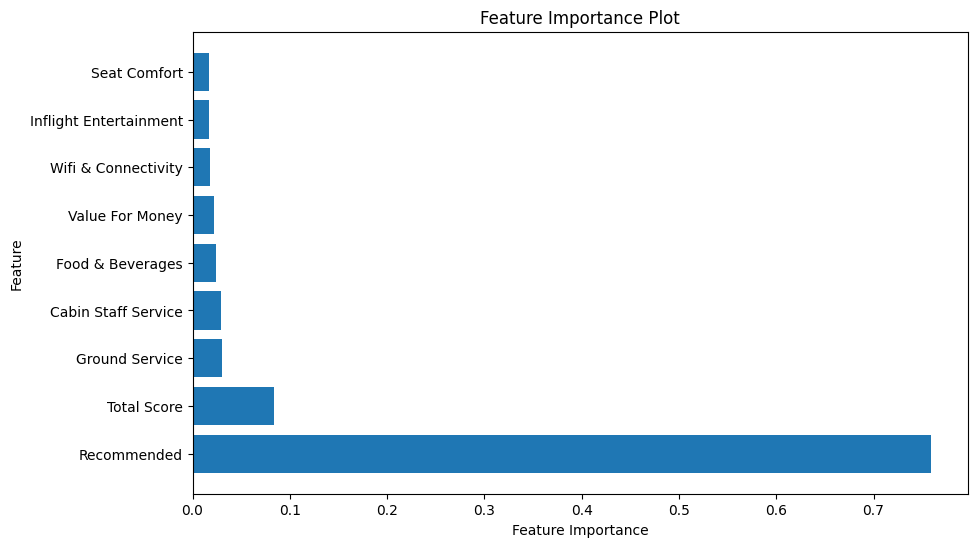

In [68]:
coef_names = ['Seat Comfort',
              'Cabin Staff Service',
              'Food & Beverages',
              'Ground Service',
              'Inflight Entertainment',
              'Wifi & Connectivity',
              'Value For Money',
              'Recommended',
              'Total Score'] 

# Get feature importances
feature_importances = best_tree_classifier.feature_importances_

# Create a pandas DataFrame to store the importances and corresponding feature names
importance_df = pd.DataFrame({'Feature': coef_names, 'Importance': feature_importances})

# Sort the DataFrame by importance values (optional but makes the plot look cleaner)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()

Random Forest

In [69]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Confusion Matrix:
[[1228   86]
 [ 492  543]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.93      0.81      1314
           1       0.86      0.55      0.67      1035

    accuracy                           0.76      2349
   macro avg       0.79      0.74      0.74      2349
weighted avg       0.78      0.76      0.75      2349



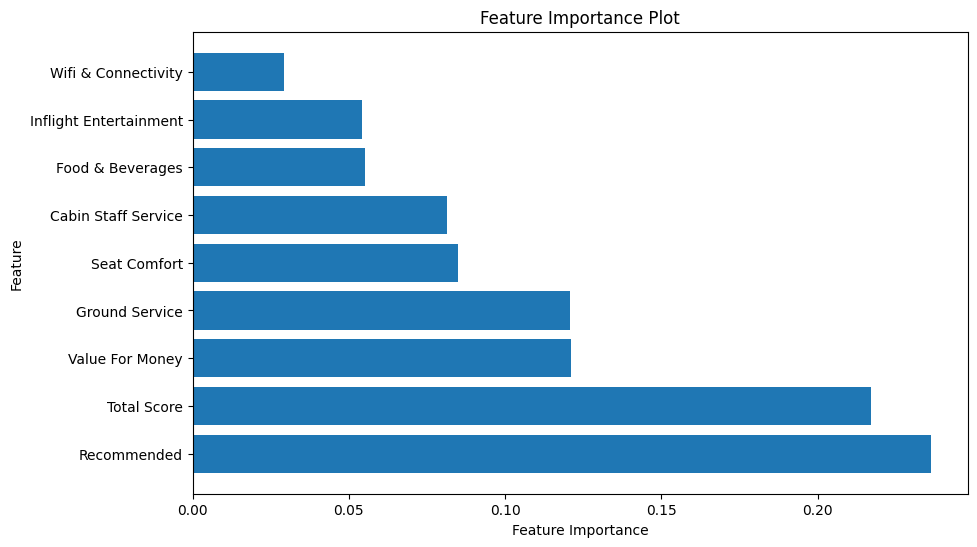

In [70]:
coef_names = ['Seat Comfort',
              'Cabin Staff Service',
              'Food & Beverages',
              'Ground Service',
              'Inflight Entertainment',
              'Wifi & Connectivity',
              'Value For Money',
              'Recommended',
              'Total Score'] 

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a pandas DataFrame to store the importances and corresponding feature names
importance_df = pd.DataFrame({'Feature': coef_names, 'Importance': feature_importances})

# Sort the DataFrame by importance values (optional but makes the plot look cleaner)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()

### Sequential Application

In [71]:
# smote

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train1, y_train1 = smote.fit_resample(X_train, y_train)

# enn

enn = EditedNearestNeighbours(sampling_strategy='auto', n_neighbors=3)
X_train2, y_train2 = enn.fit_resample(X_train1, y_train1)

# smoteenn

smote_enn = SMOTEENN(sampling_strategy='auto', random_state=42)
X_train3, y_train3 = smote_enn.fit_resample(X_train2, y_train2)

Logistic Regression

In [72]:
model = LogisticRegression()
model.fit(X_train3, y_train3)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.756066411238825
Confusion Matrix:
[[1202  112]
 [ 461  574]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.91      0.81      1314
           1       0.84      0.55      0.67      1035

    accuracy                           0.76      2349
   macro avg       0.78      0.73      0.74      2349
weighted avg       0.77      0.76      0.75      2349



Decision Tree

In [73]:
# decision tree classifier
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train3, y_train3)

## making predictions using decision tree classifier
y_pred = tree_classifier.predict(X_test)

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train3, y_train3)

best_tree_classifier = grid_search.best_estimator_

# evaluation metrics

y_pred = best_tree_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')

# Calculate recall
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print(f'F1-score: {f1:.2f}')

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.76
Precision: 0.86
Recall: 0.54
F1-score: 0.66
Confusion Matrix:
[[1221   93]
 [ 481  554]]


Random Forest

In [74]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train3, y_train3)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Confusion Matrix:
[[1221   93]
 [ 481  554]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.91      0.81      1314
           1       0.84      0.55      0.67      1035

    accuracy                           0.76      2349
   macro avg       0.78      0.73      0.74      2349
weighted avg       0.77      0.76      0.75      2349



### Parallel Application

SMOTE

Logistic Regression

In [75]:
# smote

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train1, y_train1 = smote.fit_resample(X_train, y_train)

model1 = LogisticRegression()
model1.fit(X_train1, y_train1)

y_pred1 = model1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred1)
confusion = confusion_matrix(y_test, y_pred1)
classification_rep = classification_report(y_test, y_pred1)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.7552149851000426
Confusion Matrix:
[[1184  130]
 [ 445  590]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.90      0.80      1314
           1       0.82      0.57      0.67      1035

    accuracy                           0.76      2349
   macro avg       0.77      0.74      0.74      2349
weighted avg       0.77      0.76      0.75      2349



Decision Tree

In [76]:
tree_classifier1 = DecisionTreeClassifier()
tree_classifier1.fit(X_train1, y_train1)

# making predictions using decision tree classifier
y_pred1 = tree_classifier1.predict(X_test)

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(tree_classifier1, param_grid, cv=5)
grid_search.fit(X_train1, y_train1)

best_tree_classifier1 = grid_search.best_estimator_

# evaluation metrics

y_pred = best_tree_classifier1.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred1)
print(f'Accuracy: {accuracy:.2f}')

# Calculate precision
precision = precision_score(y_test, y_pred1)
print(f'Precision: {precision:.2f}')

# Calculate recall
recall = recall_score(y_test, y_pred1)
print(f'Recall: {recall:.2f}')

# Calculate F1-score
f1 = f1_score(y_test, y_pred1)
print(f'F1-score: {f1:.2f}')

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred1)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.75
Precision: 0.80
Recall: 0.56
F1-score: 0.66
Confusion Matrix:
[[1171  143]
 [ 453  582]]


Random Forest

In [77]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train1, y_train1)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Confusion Matrix:
[[1171  143]
 [ 453  582]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.90      0.80      1314
           1       0.82      0.57      0.67      1035

    accuracy                           0.76      2349
   macro avg       0.77      0.74      0.74      2349
weighted avg       0.77      0.76      0.75      2349



ENN

Logistic Regression

In [78]:
# enn

enn = EditedNearestNeighbours(sampling_strategy='auto', n_neighbors=3)
X_train2, y_train2 = enn.fit_resample(X_train, y_train)

model2 = LogisticRegression()
model2.fit(X_train2, y_train2)

y_pred2 = model2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred2)
confusion = confusion_matrix(y_test, y_pred2)
classification_rep = classification_report(y_test, y_pred2)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.7066836951894423
Confusion Matrix:
[[960 354]
 [335 700]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.73      0.74      1314
           1       0.66      0.68      0.67      1035

    accuracy                           0.71      2349
   macro avg       0.70      0.70      0.70      2349
weighted avg       0.71      0.71      0.71      2349



Decision Tree

In [79]:
tree_classifier2 = DecisionTreeClassifier()
tree_classifier2.fit(X_train2, y_train2)

# making predictions using decision tree classifier
y_pred2 = tree_classifier2.predict(X_test)

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(tree_classifier2, param_grid, cv=5)
grid_search.fit(X_train2, y_train2)

best_tree_classifier2 = grid_search.best_estimator_

# evaluation metrics

y_pred = best_tree_classifier2.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred2)
print(f'Accuracy: {accuracy:.2f}')

# Calculate precision
precision = precision_score(y_test, y_pred2)
print(f'Precision: {precision:.2f}')

# Calculate recall
recall = recall_score(y_test, y_pred2)
print(f'Recall: {recall:.2f}')

# Calculate F1-score
f1 = f1_score(y_test, y_pred2)
print(f'F1-score: {f1:.2f}')

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred2)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.67
Precision: 0.61
Recall: 0.71
F1-score: 0.66
Confusion Matrix:
[[841 473]
 [297 738]]


Random Forest

In [80]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train2, y_train2)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Confusion Matrix:
[[841 473]
 [297 738]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.73      0.74      1314
           1       0.66      0.68      0.67      1035

    accuracy                           0.71      2349
   macro avg       0.70      0.70      0.70      2349
weighted avg       0.71      0.71      0.71      2349



SMOTE-ENN

Logistic Regression

In [81]:
# smoteenn

smote_enn = SMOTEENN(sampling_strategy='auto', random_state=42)
X_train3, y_train3 = smote_enn.fit_resample(X_train, y_train)

model3 = LogisticRegression()
model3.fit(X_train3, y_train3)

y_pred3 = model3.predict(X_test)

accuracy = accuracy_score(y_test, y_pred3)
confusion = confusion_matrix(y_test, y_pred3)
classification_rep = classification_report(y_test, y_pred3)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.7496807151979565
Confusion Matrix:
[[1164  150]
 [ 438  597]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.89      0.80      1314
           1       0.80      0.58      0.67      1035

    accuracy                           0.75      2349
   macro avg       0.76      0.73      0.73      2349
weighted avg       0.76      0.75      0.74      2349



Decision Tree

In [82]:
tree_classifier3 = DecisionTreeClassifier()
tree_classifier3.fit(X_train3, y_train3)

# making predictions using decision tree classifier
y_pred3 = tree_classifier3.predict(X_test)

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(tree_classifier3, param_grid, cv=5)
grid_search.fit(X_train3, y_train3)

best_tree_classifier3 = grid_search.best_estimator_

# evaluation metrics

y_pred = best_tree_classifier3.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred3)
print(f'Accuracy: {accuracy:.2f}')

# Calculate precision
precision = precision_score(y_test, y_pred3)
print(f'Precision: {precision:.2f}')

# Calculate recall
recall = recall_score(y_test, y_pred3)
print(f'Recall: {recall:.2f}')

# Calculate F1-score
f1 = f1_score(y_test, y_pred3)
print(f'F1-score: {f1:.2f}')

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred3)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.71
Precision: 0.68
Recall: 0.66
F1-score: 0.67
Confusion Matrix:
[[995 319]
 [354 681]]


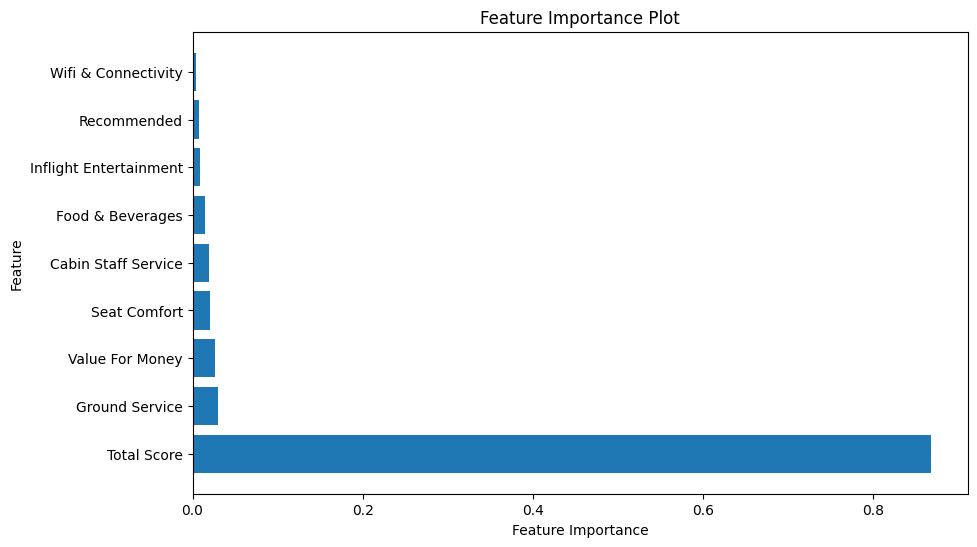

In [83]:
coef_names = ['Seat Comfort',
              'Cabin Staff Service',
              'Food & Beverages',
              'Ground Service',
              'Inflight Entertainment',
              'Wifi & Connectivity',
              'Value For Money',
              'Recommended',
              'Total Score'] 

# Get feature importances
feature_importances = best_tree_classifier.feature_importances_

# Create a pandas DataFrame to store the importances and corresponding feature names
importance_df = pd.DataFrame({'Feature': coef_names, 'Importance': feature_importances})

# Sort the DataFrame by importance values (optional but makes the plot look cleaner)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot for feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
plt.show()

Random Forest

In [84]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train3, y_train3)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

Confusion Matrix:
[[995 319]
 [354 681]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.89      0.80      1314
           1       0.80      0.58      0.67      1035

    accuracy                           0.75      2349
   macro avg       0.76      0.73      0.73      2349
weighted avg       0.76      0.75      0.74      2349

